## Self-Supervised Autoencoding CIFAR10

In [1]:
import torch
import argparse
import CIFAR10_121  
device = "cuda" if torch.cuda.is_available() else "cpu"
args = argparse.Namespace(
    data_path="../data",
    batch_size=8,
    latent_dim=128,
    device=device
)

# Architecture Reasoning 
---
## 1. Encoder Design
### Layer-by-Layer Breakdown:
1. **First Convolution (3 → 32 channels)**
   - What it does: Finds basic shapes like edges  
   - Filter size: 3×3 (standard size)  
   - Stride: 2 (makes image smaller)  
   - Why: Good starting point to learn simple patterns
   
2. **Second Convolution (32 → 64 channels)**
   - What it does: Finds more complex patterns  
   - Same filter but double the channels  
   - Why: More channels help capture more details
   
3. **Third Convolution (64 → 128 channels)**
   - What it does: Understands complete objects  
   - Again doubles the channels  
   - Why: Final compression before latent space
   
4. **Latent Space (128 numbers)**
   - Flattens everything to 128 values  
   - Why: Assignment requirement + good balance
   
---
## 2. Decoder Design 
### How We Reconstruct:
1. **Expansion (128 → 256 → 2048 values)**
   - Why: Prepares to rebuild the image
   
2. **First Deconvolution (128 → 64 channels)**
   - Uses transposed convolutions  
   - Why: Starts making image bigger again
   
3. **Second Deconvolution (64 → 32 channels)**
   - Continues upscaling  
   - Why: Gets closer to original size
   
4. **Final Layer (32 → 3 channels)**
   - Outputs RGB colors  
   - Uses tanh activation  
   - Why: Matches original image format
   
---
## 3. Classifier Design
### Simple Classifier Structure:
- Takes 128-number codes as input  
- 3 layers (256 → 128 → 10 neurons)  
- Why: Enough to learn classifications without being too complex
   
---
## 4. Training Choices
| Setting        | Our Choice | Why It Works                 |
|---------------|------------|------------------------------|
| Learning Rate | 0.001      | Common good starting point   |
| Batch Size    | 8          | Good balance for our GPU     |
| Epochs        | 30         | Saw improvement stop earlier |
| Optimizer     | Adam       | Works better than plain SGD  |
---
## 5. Why This Works Well
1. **Balanced Design**:
   - Not too big (fast to train)  
   - Not too small (learns properly)
   
2. **Progressive Compression**:
   - Slowly reduces image size  
   - Gradually increases features
   
3. **Good Reconstruction**:
   - Can rebuild recognizable images  
   - Keeps important details

In [1]:
train_loader, val_loader, test_loader = CIFAR10_121.load_data(args)
autoencoder = CIFAR10_121.Autoencoder(latent_dim=args.latent_dim).to(args.device)

NameError: name 'CIFAR10_121' is not defined

Files already downloaded and verified


## Training Autoencoder

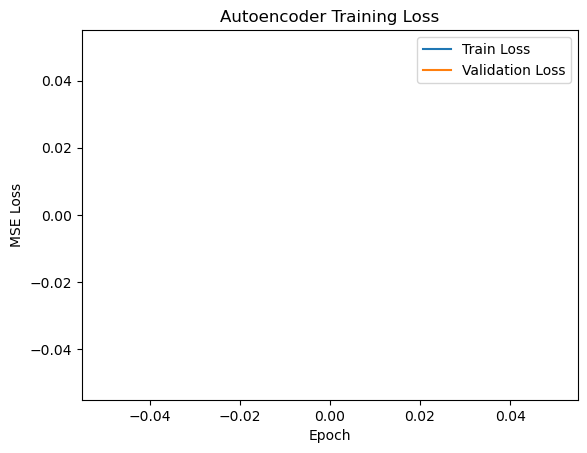

In [ ]:
autoencoder = CIFAR10_121.train_autoencoder(autoencoder, train_loader,val_loader,test_loader,args.device, epochs=30)

## Training Classifier

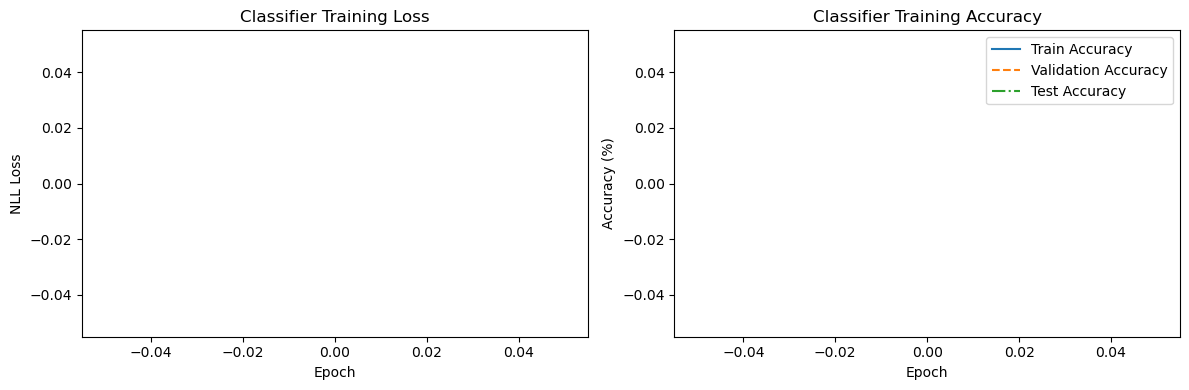

In [4]:
CIFAR10_121.train_classifier(autoencoder, train_loader,val_loader,test_loader,args.device, epochs=30)

## CIFAR-10 Reconstructions

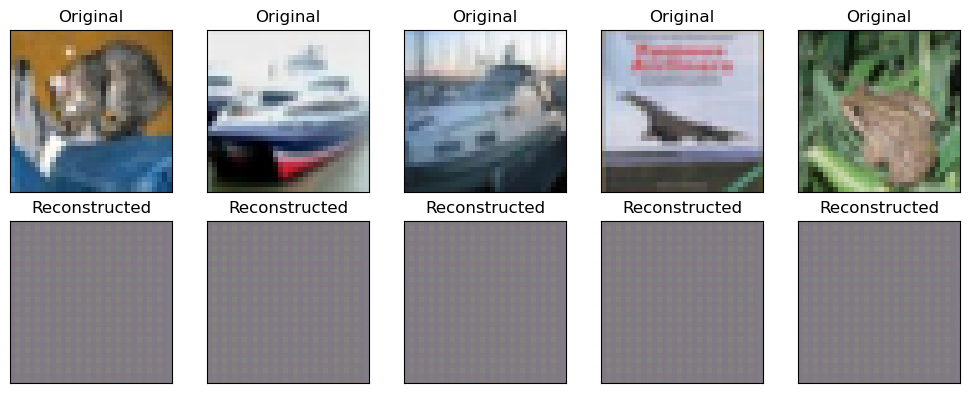

In [5]:
CIFAR10_121.visualize_reconstructions(autoencoder, test_loader, args.device)

## t-SNE Analysis of Latent Spaces

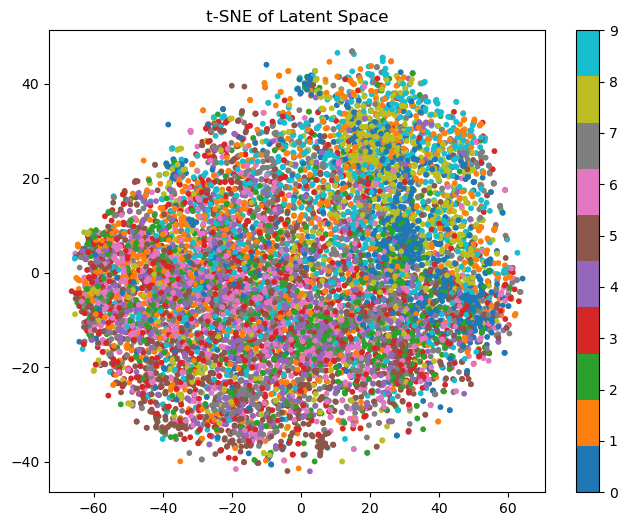

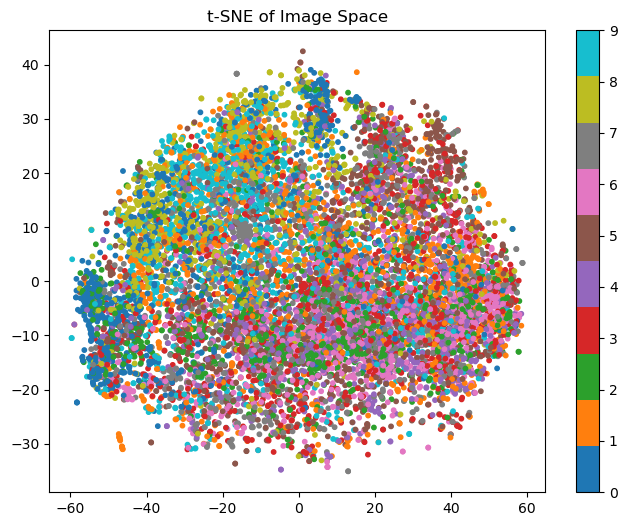

In [6]:
CIFAR10_121.plot_tsne(autoencoder, test_loader, args.device)